In [ ]:
import pickle
import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

In [85]:
def visualize_average_lowrank(fname, k=0, y_scale="log"):
    results = pickle.load(open(fname, 'rb'))

    f, axes = plt.subplots(1, 2, figsize=(20, 10))

    ax1, ax2 = axes

    #results = {"dense": results}

    names = list(results.keys())
    print([len(results[name]['val_acc']) for name in results.keys()])
    print([len(results[name]['train_acc']) for name in results.keys()])
    maxlen = min(min([len(results[name]['val_acc']) for name in results.keys()]),
                 min([len(results[name]['train_acc']) for name in results.keys()]))

    filtered = [(name, np.mean(results[name]['val_acc'][-10:])) for name in results.keys()]
    from operator import itemgetter
    filtered.sort(key=itemgetter(1), reverse=True)
    filtered = filtered[:]
    #filtered_names = [name for (name, _) in filtered]
    filtered_names = list(zip(*filtered))[0]
    filtered_results = {name: results[name] for name in list(zip(*filtered))[0]}

    lowrank_train_history = [filtered_results[name]['train_acc'][:maxlen] for name in filtered_results if "lowrank" in name]
    lowrank_val_history = [filtered_results[name]['val_acc'][:maxlen] for name in filtered_results if "lowrank" in name]

    rieman_train_history = [filtered_results[name]['train_acc'][:maxlen] for name in filtered_results if "rieman" in name]
    rieman_val_history = [filtered_results[name]['val_acc'][:maxlen] for name in filtered_results if "rieman" in name]

    dense_train_history = [filtered_results[name]['train_acc'][:maxlen] for name in filtered_results if "dense" in name]
    dense_val_history = [filtered_results[name]['val_acc'][:maxlen] for name in filtered_results if "dense" in name]

    
    all_results = {
        'lowrank': {
            'train_acc': np.mean(lowrank_train_history, axis=0),
            'val_acc': np.mean(lowrank_val_history, axis=0)
        },
        'rieman': {
            'train_acc': np.mean(rieman_train_history, axis=0),
            'val_acc': np.mean(rieman_val_history, axis=0)
        },
        'dense': {
            'train_acc': np.mean(dense_train_history, axis=0),
            'val_acc': np.mean(dense_val_history, axis=0)
        }
    }

    for name in all_results:
        train_seq = all_results[name]['train_acc'][k:]
        #if 'kron' in name:
        #    name = name.split(',')[0] + str(compute_rank((None, 64, 7, 7), 1024, 3, float(name.split(',')[1][:-2])))
        #print(name)
        #print(train_seq)
        #print('-'*80)
        ax1.plot(np.arange(len(train_seq)) + k + 1, train_seq, label=name)

    for name in all_results:
        val_seq = all_results[name]['val_acc'][k:]
        #if 'kron' in name:
        #    name = name.split(',')[0] + str(compute_rank((None, 64, 7, 7), 1024, 3, float(name.split(',')[1][:-2])))
        #print(name)
        #print(val_seq)
        #print('-'*80)
        ax2.plot(np.arange(len(val_seq)) + k + 1, val_seq, label=name)

    ax1.legend(loc=4)
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('accuracy')
    ax1.set_title('train accuracy')
    ax2.legend(loc=4)
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('accuracy')
    ax2.set_title('validation accuracy')
    #ax1.set_yscale(y_scale)
    #ax2.set_yscale(y_scale)
    #plt.savefig('results_look.png', dpi=200)

[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]


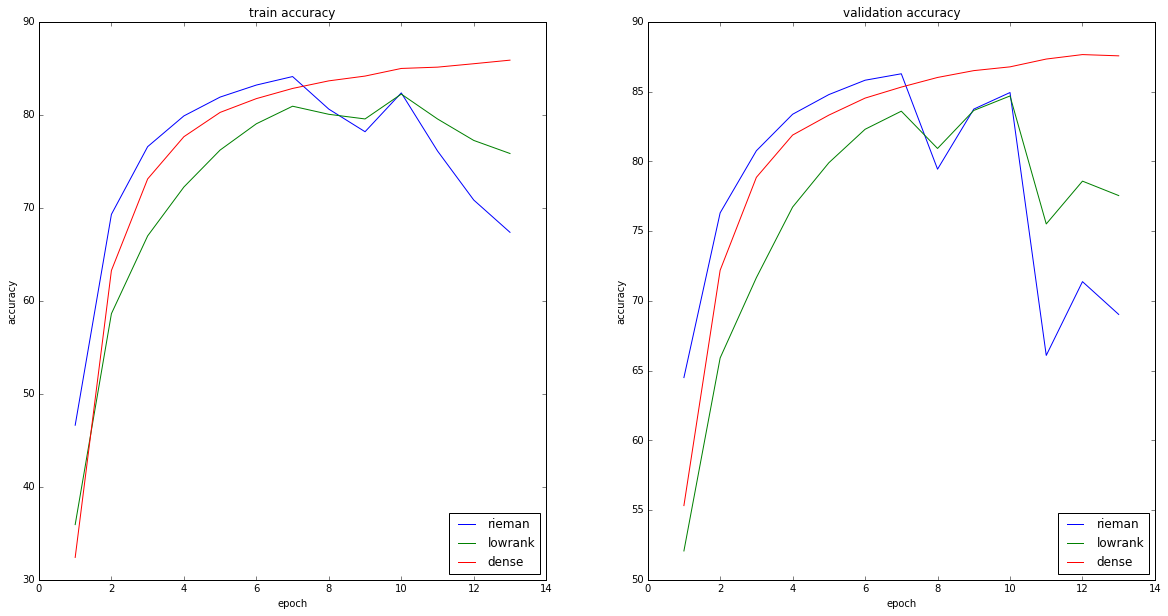

In [412]:
visualize_average_lowrank('compare_simpliest_nn_lowrank_256_16.dict')

In [141]:
b = 1.0 / 1e-19

In [ ]:
float('inf') * 0

In [189]:
float('inf') * 0.0

nan

ZeroDivisionError: float division by zero

In [609]:
def max_sqrt_factor(n):
    max_factor = 1
    for i in np.arange(1, np.sqrt(n) + 1, dtype=int):
        if n % i == 0:
            max_factor = i
    return max_factor


def compute_rank(input_shape, units, index, percentage):
    block_shape = (input_shape[index], max_sqrt_factor(units))
    outer_shape = (int(np.prod(input_shape[1:]) / block_shape[0]), units // block_shape[1])
    max_rank = int(min(np.prod(block_shape), np.prod(outer_shape)))
    return max(1, int(max_rank * percentage))

In [610]:
def visualize_krons(k=0):
    results = pickle.load(open('results/401_history.dict', 'r'))

    f, axes = plt.subplots(1, 2, figsize=(20, 10))

    ax1, ax2 = axes

    #results = {"dense": results}

    names = list(results.keys())

    filtered = [(name, np.mean(results[name]['val_acc'][-10:])) for name in results.keys()]
    from operator import itemgetter
    filtered.sort(key=itemgetter(1), reverse=True)
    filtered = filtered[:]
    filtered_names = zip(*filtered)[0]
    filtered_results = {name: results[name] for name in zip(*filtered)[0]}

    for name in filtered_names:
        train_seq = filtered_results[name]['train_acc'][k:]
        if 'kron' in name:
            name = name.split(',')[0] + str(compute_rank((None, 64, 7, 7), 1024, 3, float(name.split(',')[1][:-2])))
        ax1.plot(np.arange(len(train_seq)) + k + 1, train_seq, label=name)

    for name in filtered_names:
        val_seq = filtered_results[name]['val_acc'][k:]
        if 'kron' in name:
            name = name.split(',')[0] + str(compute_rank((None, 64, 7, 7), 1024, 3, float(name.split(',')[1][:-2])))
        ax2.plot(np.arange(len(val_seq)) + k + 1, val_seq, label=name)

    ax1.legend(loc=4)
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('accuracy')
    ax1.set_title('train accuracy')
    ax2.legend(loc=4)
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('accuracy')
    ax2.set_title('validation accuracy')
    #plt.savefig('results_look.png', dpi=200)

In [611]:
def visualize_dense_only(k=0):
    results = pickle.load(open('models/adam_fixed_cnn_1e-4_1024_dense_model.dict', 'r'))

    f, axes = plt.subplots(1, 2, figsize=(20, 10))

    ax1, ax2 = axes

    results = {"dense": results}

    names = list(results.keys())

    filtered = [(name, np.mean(results[name]['val_acc'][-10:])) for name in results.keys()]
    from operator import itemgetter
    filtered.sort(key=itemgetter(1), reverse=True)
    filtered = filtered[:]
    filtered_names = zip(*filtered)[0]
    filtered_results = {name: results[name] for name in zip(*filtered)[0]}

    for name in filtered_names:
        train_seq = filtered_results[name]['train_acc'][k:]
        if 'kron' in name:
            name = name.split(',')[0] + str(compute_rank((None, 64, 7, 7), 1024, 3, float(name.split(',')[1][:-2])))
        ax1.plot(np.arange(len(train_seq)) + k + 1, train_seq, label=name)

    for name in filtered_names:
        val_seq = filtered_results[name]['val_acc'][k:]
        if 'kron' in name:
            name = name.split(',')[0] + str(compute_rank((None, 64, 7, 7), 1024, 3, float(name.split(',')[1][:-2])))
        ax2.plot(np.arange(len(val_seq)) + k + 1, val_seq, label=name)

    ax1.legend(loc=4)
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('accuracy')
    ax1.set_title('train accuracy')
    ax2.legend(loc=4)
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('accuracy')
    ax2.set_title('validation accuracy')
    #plt.savefig('results_look.png', dpi=200)

In [612]:
def visualize_dense_orig_only(k=0):
    results = pickle.load(open('models/adam_1e-4_1024_dense_model.dict', 'r'))

    f, axes = plt.subplots(1, 2, figsize=(20, 10))

    ax1, ax2 = axes

    results = {"dense": results}

    names = list(results.keys())

    filtered = [(name, np.mean(results[name]['val_acc'][-10:])) for name in results.keys()]
    from operator import itemgetter
    filtered.sort(key=itemgetter(1), reverse=True)
    filtered = filtered[:]
    filtered_names = zip(*filtered)[0]
    filtered_results = {name: results[name] for name in zip(*filtered)[0]}

    for name in filtered_names:
        train_seq = filtered_results[name]['train_acc'][k:]
        if 'kron' in name:
            name = name.split(',')[0] + str(compute_rank((None, 64, 7, 7), 1024, 3, float(name.split(',')[1][:-2])))
        ax1.plot(np.arange(len(train_seq)) + k + 1, train_seq, label=name)

    for name in filtered_names:
        val_seq = filtered_results[name]['val_acc'][k:]
        if 'kron' in name:
            name = name.split(',')[0] + str(compute_rank((None, 64, 7, 7), 1024, 3, float(name.split(',')[1][:-2])))
        ax2.plot(np.arange(len(val_seq)) + k + 1, val_seq, label=name)

    ax1.legend(loc=4)
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('accuracy')
    ax1.set_title('train accuracy')
    ax2.legend(loc=4)
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('accuracy')
    ax2.set_title('validation accuracy')
    #plt.savefig('results_look.png', dpi=200)

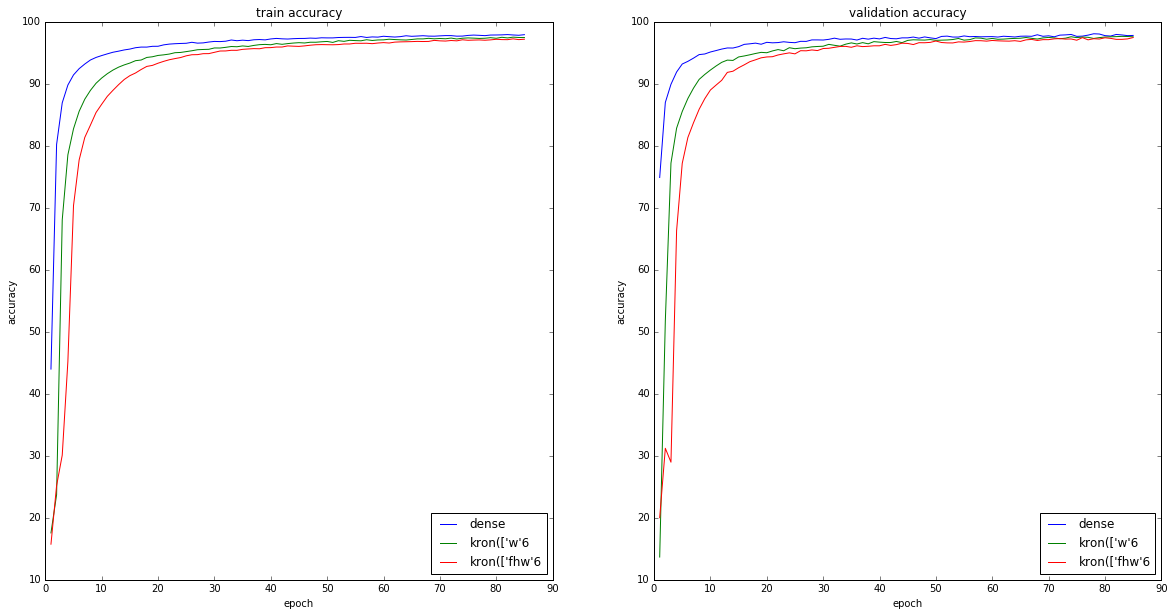

In [613]:
visualize_krons(0)

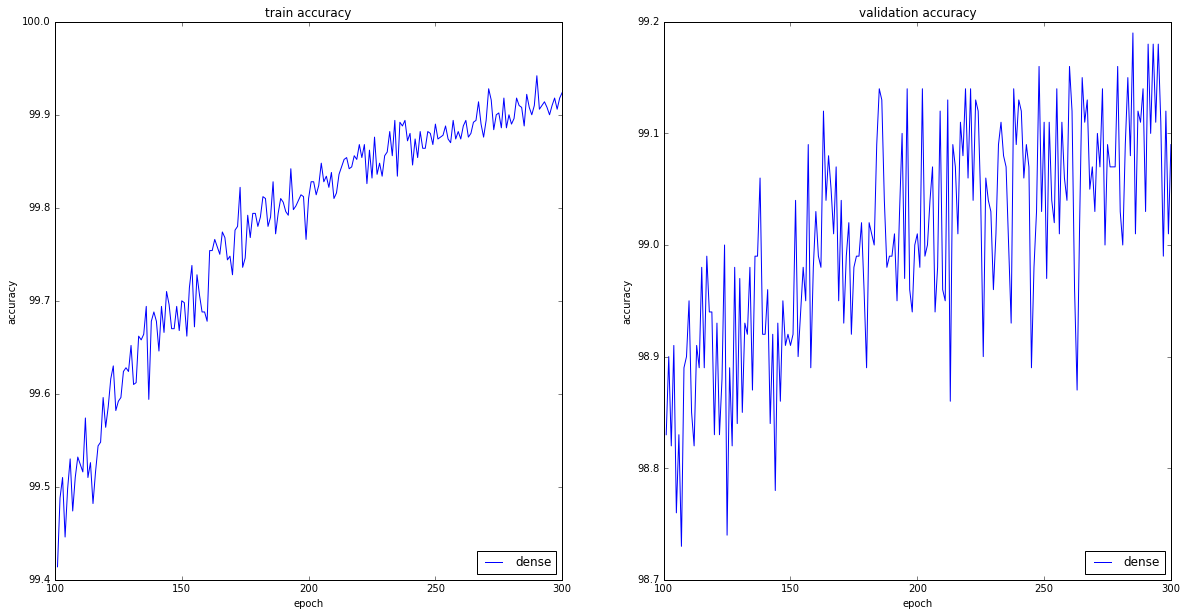

In [614]:
visualize_dense_only(100)

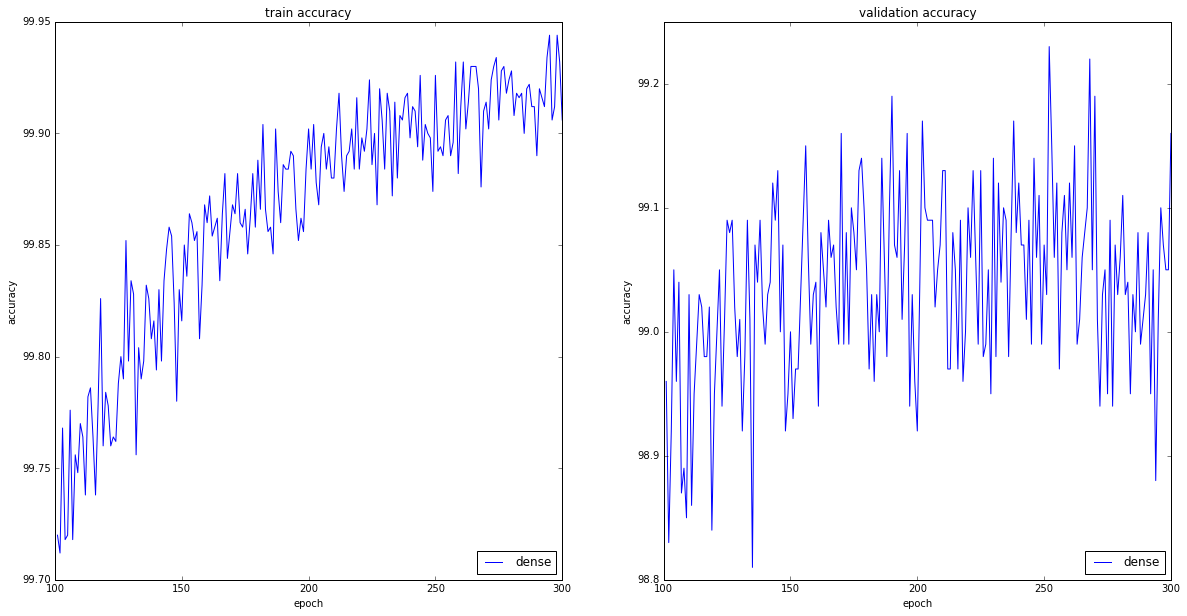

In [615]:
visualize_dense_orig_only(100)

In [545]:
ls models

adam_1e-4_1024_dense_model.dict
adam_1e-4_1024_dense_model.npz
adam_1e-4_1024_dense_model_best.npz
adam_1em3_dense_model.dict
adam_1em3_dense_model.npz
adam_1em3_dense_model_best.npz
adam_2e-4_2048_dense_model.dict
adam_2e-4_2048_dense_model.npz
adam_2e-4_2048_dense_model_best.npz
adam_2em5_dense_model.dict
adam_2em5_dense_model.npz
adam_2em5_dense_model_best.npz
adam_fixed_cnn_1e-4_1024_dense_model.dict
adam_fixed_cnn_1e-4_1024_dense_model.npz
adam_fixed_cnn_1e-4_1024_dense_model_best.npz
default_dense_model.dict
default_dense_model.npz


In [5]:
def visualize_lowranks(k=0):
    results = pickle.load(open('determine_history_lowrank.dict', 'r'))

    f, axes = plt.subplots(1, 2, figsize=(20, 10))

    ax1, ax2 = axes

    #results = {"dense": results}

    names = list(results.keys())
    for name in names:
        train_seq = results[name]['train_acc'][k:]
        val_seq = results[name]['val_acc'][k:]
        ax1.plot(np.arange(len(train_seq)) + k + 1, train_seq, label=name)
        ax2.plot(np.arange(len(val_seq)) + k + 1, train_seq, label=name)
    ax1.legend(loc=4)
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('accuracy')
    ax1.set_title('train accuracy')
    ax2.legend(loc=4)
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('accuracy')
    ax2.set_title('validation accuracy')
    
"""
    filtered = [(name, np.mean(results[name]['val_acc'][-10:])) for name in results.keys()]
    from operator import itemgetter
    filtered.sort(key=itemgetter(1), reverse=True)
    filtered = filtered[:]
    filtered_names = zip(*filtered)[0]
    filtered_results = {name: results[name] for name in zip(*filtered)[0]}

    for name in filtered_names:
        train_seq = filtered_results[name]['train_acc'][k:]
        if 'kron' in name:
            name = name.split(',')[0] + str(compute_rank((None, 64, 7, 7), 1024, 3, float(name.split(',')[1][:-2])))
        ax1.plot(np.arange(len(train_seq)) + k + 1, train_seq, label=name)

    for name in filtered_names:
        val_seq = filtered_results[name]['val_acc'][k:]
        if 'kron' in name:
            name = name.split(',')[0] + str(compute_rank((None, 64, 7, 7), 1024, 3, float(name.split(',')[1][:-2])))
        ax2.plot(np.arange(len(val_seq)) + k + 1, val_seq, label=name)

    ax1.legend(loc=4)
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('accuracy')
    ax1.set_title('train accuracy')
    ax2.legend(loc=4)
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('accuracy')
    ax2.set_title('validation accuracy')
    #plt.savefig('results_look.png', dpi=200)
"""
None

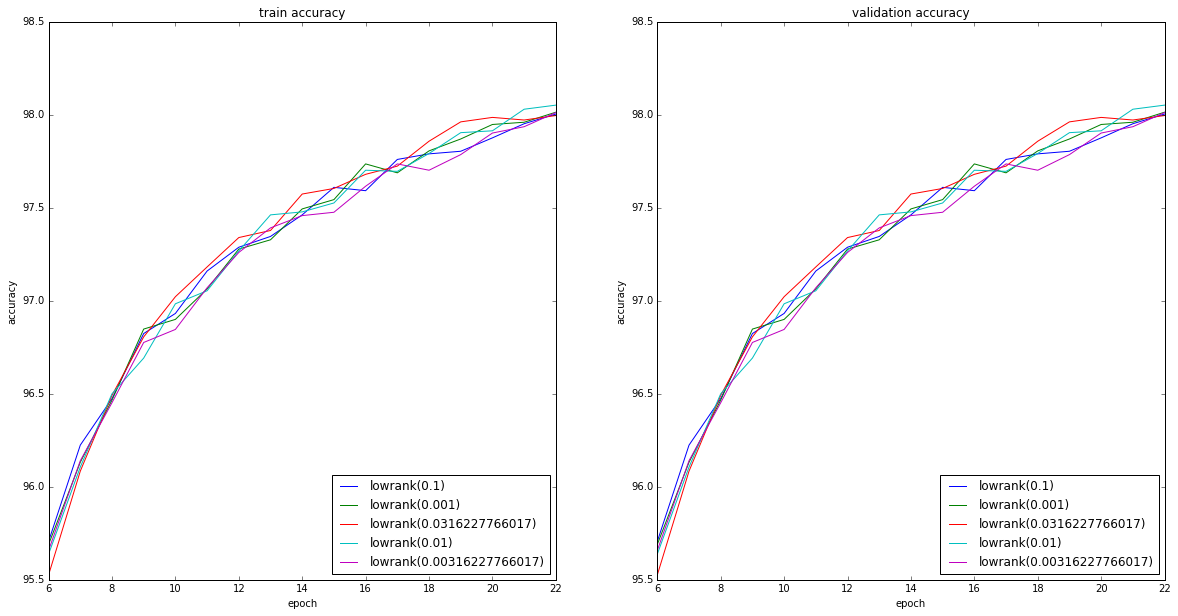

In [12]:
visualize_lowranks(k=5)

In [15]:
def visualize_krons(k=0):
    results = pickle.load(open('compare_krons.dict', 'r'))

    f, axes = plt.subplots(1, 2, figsize=(20, 10))

    ax1, ax2 = axes

    #results = {"dense": results}

    names = list(results.keys())
    for name in names:
        train_seq = results[name]['train_acc'][k:]
        val_seq = results[name]['val_acc'][k:]
        ax1.plot(np.arange(len(train_seq)) + k + 1, train_seq, label=name)
        ax2.plot(np.arange(len(val_seq)) + k + 1, train_seq, label=name)
    ax1.legend(loc=4)
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('accuracy')
    ax1.set_title('train accuracy')
    ax2.legend(loc=4)
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('accuracy')
    ax2.set_title('validation accuracy')

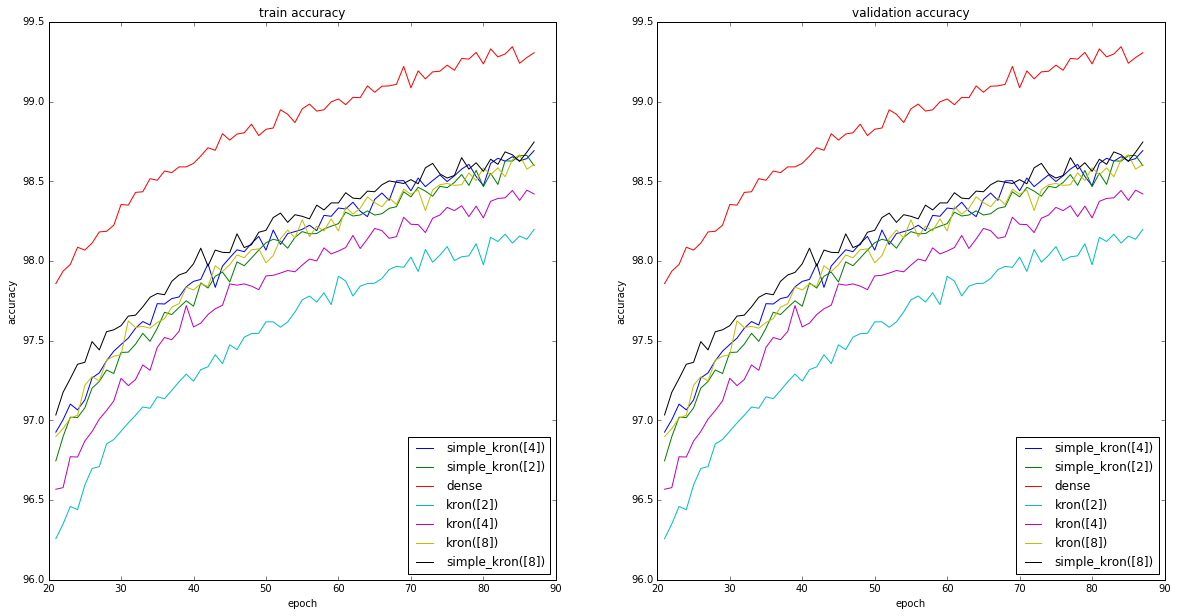

In [18]:
visualize_krons(20)

In [207]:
a = np.array([float('nan')]*5)

In [209]:
a[::2] = 0

In [216]:
import numpy
import theano
import theano.tensor as T

In [361]:
eps=1e-10

U = T.dmatrix('U')
V = T.dmatrix('V')
S = T.dmatrix('S')
umask = 1 - (1 - T.isnan(U)) * (1 - T.isinf(U)) # indicators of nan/inf values
vmask = 1 - (1 - T.isnan(V)) * (1 - T.isinf(V)) # indicators of nan/inf values
# U S V => U mask product by columns, V by rows
smask = 1 - T.prod(1 - umask, axis=0) * T.prod(1 - vmask, axis=1)
dS = T.diag(S)
dU = T.set_subtensor(U[umask.nonzero()], 0.0)
dS_pinv = T.switch(T.gt(abs(dS), eps), 1.0 / dS, 0.0)
dS_pinv = T.set_subtensor(dS_pinv[smask.nonzero()], 0.0)
dS_pinv = T.diag(dS_pinv)
dV = T.set_subtensor(V[vmask.nonzero()], 0.0)
dU = dU.dot(dS_pinv)
dV = dS_pinv.dot(dV)

func = theano.function([U, S, V], [dU, dS_pinv, dV, umask, smask, vmask])

In [384]:
n = 5
u = np.random.randn(n, n)
v = np.random.randn(n, n)
s = np.random.randn(n)
s[0] = 1e-12
s[4] = 1e-9
u[0, ::3] = np.nan
u[3, 1::3] = np.nan
v[1, ::2] = np.nan
v[3, 1::3] = np.nan

In [385]:
print(u, s, v)

[[        nan  0.36849319  0.10675808         nan  0.13861089]
 [-0.12101526  1.20325642 -0.49882471  1.07341928  0.8672004 ]
 [-0.37790392 -0.05352764 -0.87707287  0.85792759  0.4710781 ]
 [ 0.30633228         nan -0.28162824 -1.74348845         nan]
 [ 0.33026111  1.55407335  0.26007844  0.91401933  1.48085854]] [  1.00000000e-12  -2.59786134e+00  -3.42531324e-01  -4.09347132e-01
   1.00000000e-09] [[ 0.40070179  0.13954156  0.02053885 -0.90155827 -0.60281057]
 [        nan  1.74340967         nan  0.8464526          nan]
 [-2.14517709  0.26177256 -0.48577206  1.00388889  0.58760936]
 [ 1.7507576          nan -0.64744755  1.12226604         nan]
 [-0.10666888  0.41730426  0.20595528  0.55515746  0.11521901]]


In [386]:
du, ds, dv, um, sm, vm = func(u, np.diag(s), v)

In [387]:
print(du)
print(um)

[[ 0.          0.         -0.31167393  0.          0.        ]
 [ 0.          0.          1.45628933  0.          0.        ]
 [ 0.          0.          2.56056251  0.          0.        ]
 [ 0.          0.          0.82219703  0.          0.        ]
 [ 0.          0.         -0.75928368  0.          0.        ]]
[[1 0 0 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 0 0 1]
 [0 0 0 0 0]]


In [388]:
print(ds)
print(sm)

[[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.         -2.91944102  0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]
[1 1 0 1 1]


In [389]:
print(dv)
print(vm)

[[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 6.262718   -0.76422956  1.41818289 -2.9307944  -1.71549087]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]
[[0 0 0 0 0]
 [1 0 1 0 1]
 [0 0 0 0 0]
 [0 1 0 0 1]
 [0 0 0 0 0]]


In [390]:
np.prod(1 - um, axis=0)

array([0, 0, 1, 0, 0])

In [383]:
np.prod(1 - vm, axis=1)

array([1, 0, 1, 0, 1])